C:\Users\aneek\AppData\Local\Temp\ipykernel_20188\1282585810.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['P2']=X['Price']*X['Price']


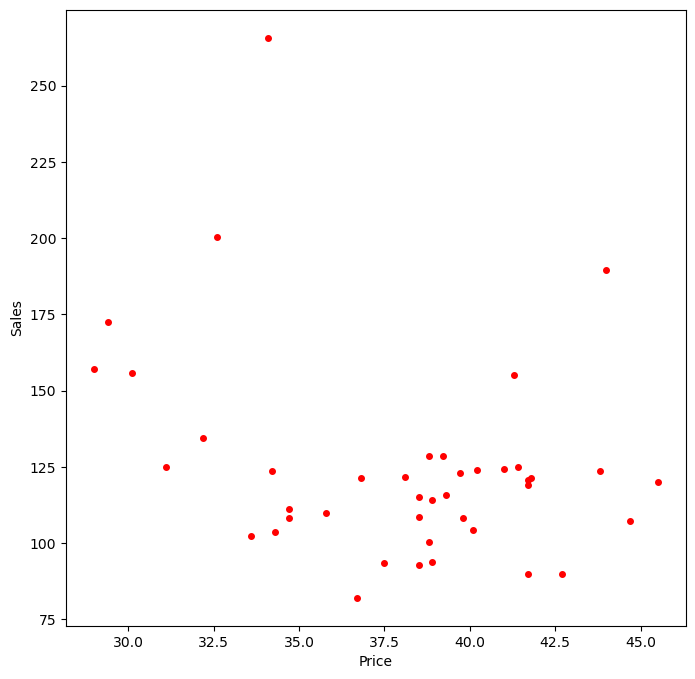

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     4.567
Date:                Fri, 14 Nov 2025   Prob (F-statistic):             0.0165
Time:                        08:23:35   Log-Likelihood:                -202.24
No. Observations:                  42   AIC:                             410.5
Df Residuals:                      39   BIC:                             415.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        937.9873    335.727      2.794      0.0

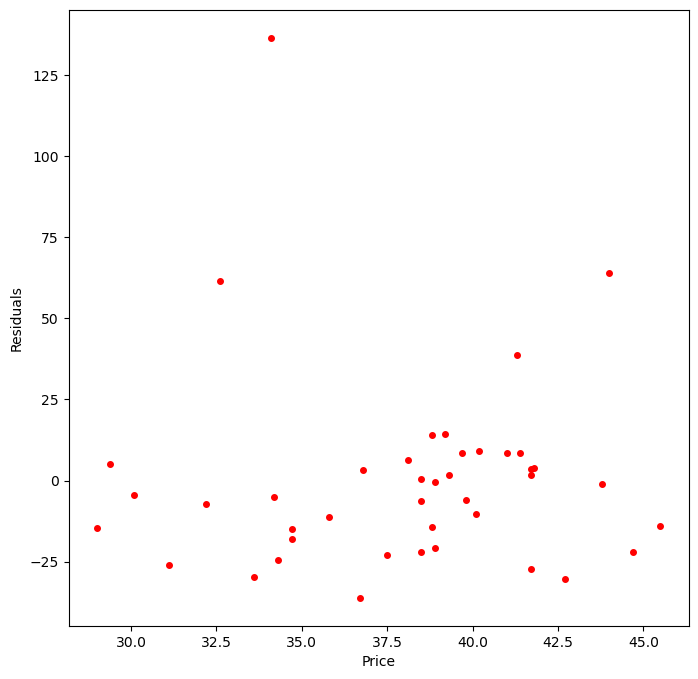

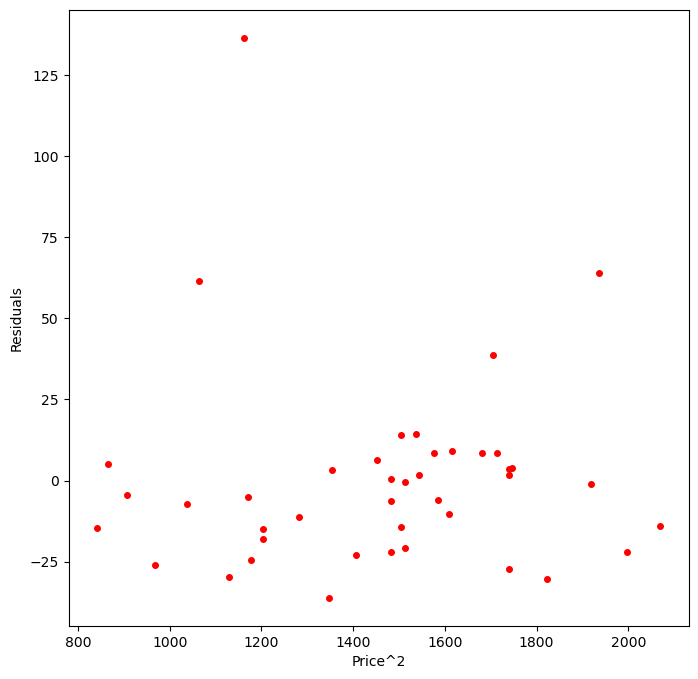

[('Lagrange multiplier statistic', np.float64(0.7457414721408586)), ('p-value', np.float64(0.68875425817187)), ('f-value', np.float64(0.3524959416474901)), ('f p-value', np.float64(0.705147809733536))]


C:\Users\aneek\AppData\Local\Temp\ipykernel_20188\1282585810.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X1['P2']=X1['Price']*X1['Price']


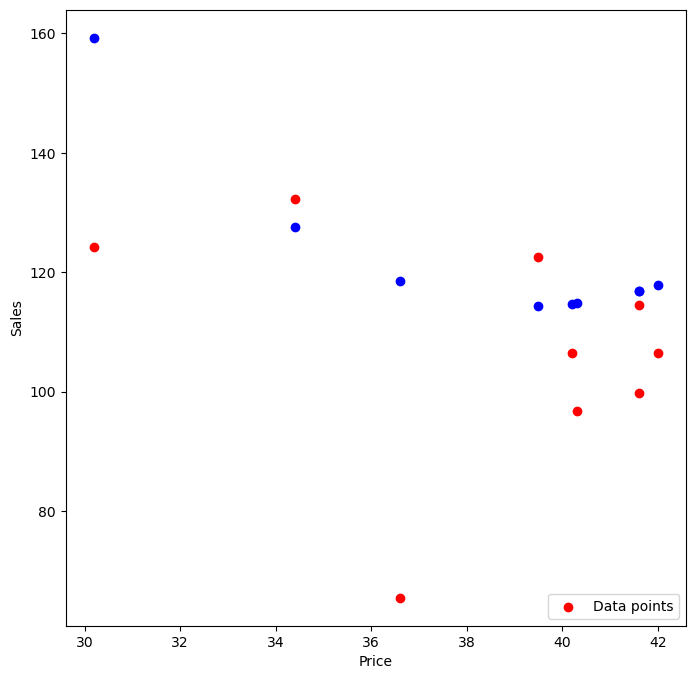

RMSE: 23.443715348612354
30.2
42.0
65.5
132.2
114.34457074112082
159.25573385220676


In [1]:
# -*- coding: utf-8 -*-
"""
Created on Tue Apr 29 11:29:48 2025

@author: aneek
"""

import numpy as np
import os
import pandas as pd
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
pd.set_option('display.max_column',None)
file_p='C:\\Users\\aneek\\My Drive\\data\\cigarette_consumption.xlsx'
d1=pd.read_excel(file_p)
d2=d1.loc[:41]
d3=d1.loc[42:]
d2=sm.add_constant(d2) #d2 is training data
d3=sm.add_constant(d3) #d3 is test data
X=d2[['const','Price']]
Y=d2['Sales']
X['P2']=X['Price']*X['Price']
fig,ax=plt.subplots(figsize=(8,8))
plt.scatter(d2[['Price']],d2[['Sales']],s=16,color='red')
plt.xlabel('Price')
plt.ylabel('Sales')
plt.show()
model1=sm.OLS(Y,X).fit()
print(model1.summary())
fig,ax=plt.subplots(figsize=(8,8))
plt.scatter(d2[['Price']],model1.resid,s=16,color='red')
plt.xlabel('Price')
plt.ylabel('Residuals')
plt.show()
fig,ax=plt.subplots(figsize=(8,8))
plt.scatter(X[['P2']],model1.resid,s=16,color='red')
plt.xlabel('Price^2')
plt.ylabel('Residuals')
plt.show()
test_result = sms.het_breuschpagan(model1.resid, model1.model.exog, robust=True)
names = ['Lagrange multiplier statistic', 'p-value',
         'f-value', 'f p-value']
print(list(lzip(names, test_result)))
X1=d3[['const','Price']]
X1['P2']=X1['Price']*X1['Price']
Y_fit=model1.predict(X1)
fig,ax=plt.subplots(figsize=(8,8))
plt.scatter(X1['Price'],d3['Sales'], color='red', label="Data points")
plt.plot(X1['Price'], Y_fit,marker='o' ,ms=6, linestyle="",color='blue')
plt.xlabel('Price')
plt.ylabel('Sales')
plt.legend(loc='lower right')
plt.show()
mse=mean_squared_error(d3['Sales'],Y_fit)
rmse=np.sqrt(mse)
print(f"RMSE: {rmse}")
print(np.min(X1['Price']))
print(np.max(X1['Price']))
print(np.min(d3['Sales'])) #Actual
print(np.max(d3['Sales']))
print(np.min(Y_fit)) #predicted
print(np.max(Y_fit)) 



